# **Pedestrian detection**
In this notebook we'll see how to detect pedestrians on images and videos using openCV and its *Histogram of oriented gradient* module in a very quick and simple way

### **Part 1 image input**

In [1]:
import cv2
import imutils
hog= cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [2]:
image=cv2.imread('pic.jpg')
image=imutils.resize(image,width=min(400,image.shape[1]))

In [3]:
(regions,_)=hog.detectMultiScale(image,winStride=(4,4),padding=(4,4),scale=1.05)

In [4]:
for(x,y,w,h)in regions:
  cv2.rectangle(image,(x,y),
              (x+w,y+h),
              (0,0,255),
              2)


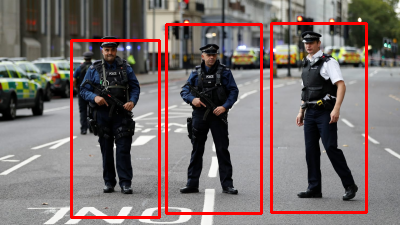

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

[INFO]: 4 original boxes, 4 after suppression


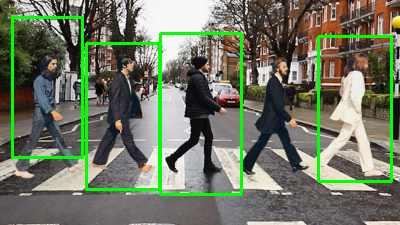

In [16]:
import numpy as np
from imutils.object_detection import non_max_suppression

image2=cv2.imread('pic_perso.jpg')
image2=imutils.resize(image2,width=min(400,image.shape[1]))

(rects, weights) = hog.detectMultiScale(image2, winStride=(4, 4),
		padding=(8, 8), scale=1.05)
for (x, y, w, h) in rects:
	cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 0, 255), 2)

rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

for (xA, yA, xB, yB) in pick:
	cv2.rectangle(image2, (xA, yA), (xB, yB), (0, 255, 0), 2)

print("[INFO]: {} original boxes, {} after suppression".format(
	 len(rects), len(pick)))
from google.colab.patches import cv2_imshow
cv2_imshow(image2)

### **Part 2 video input**

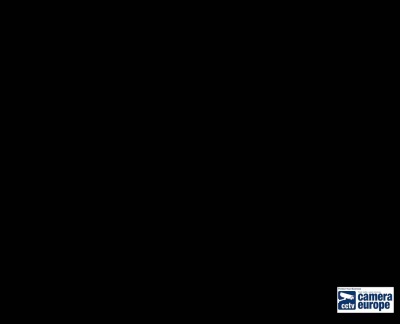

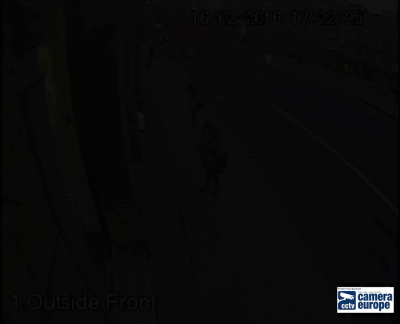

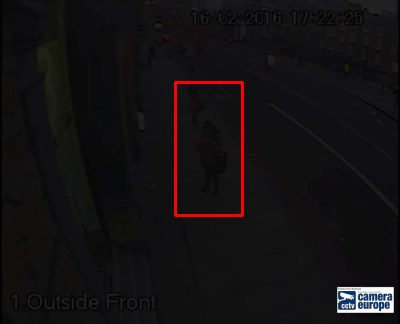

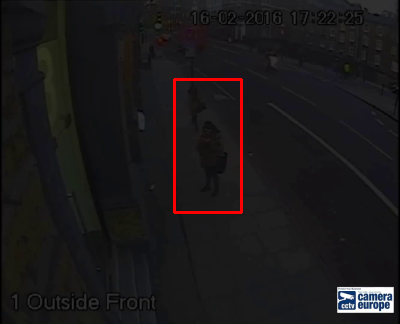

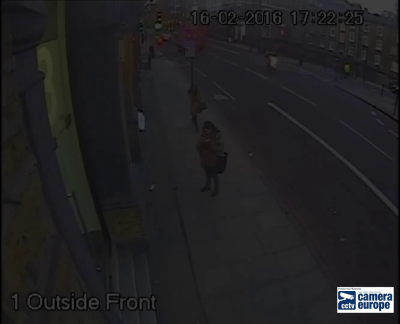

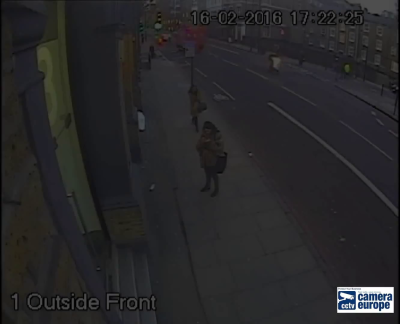

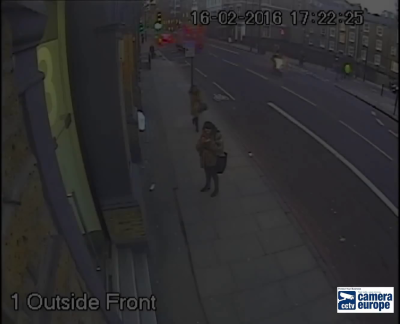

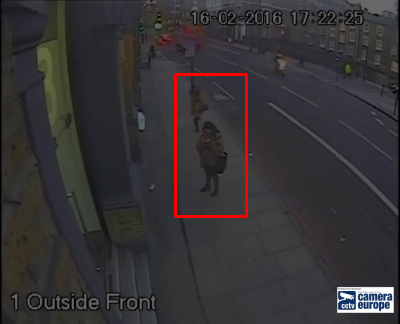

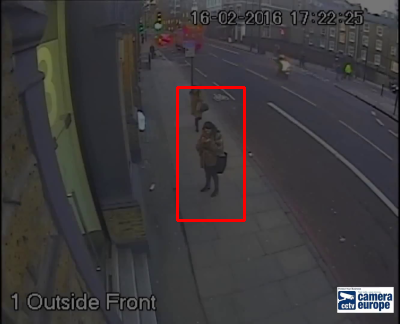

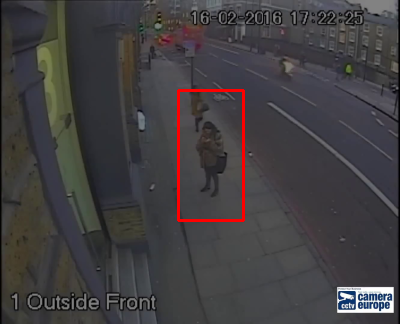

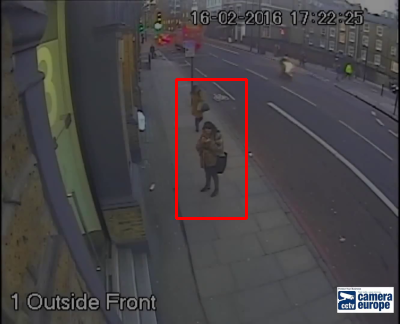

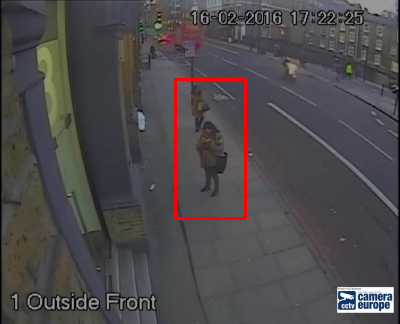

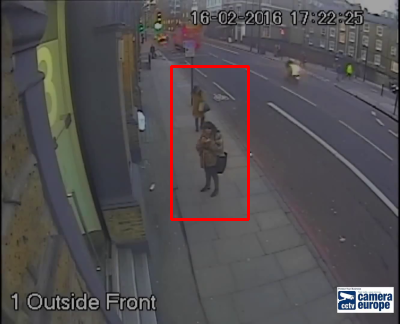

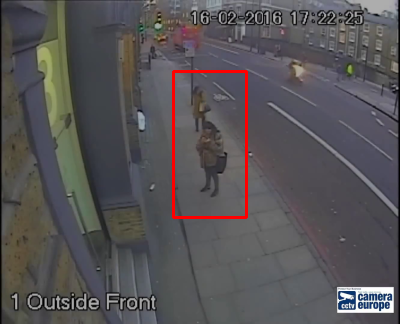

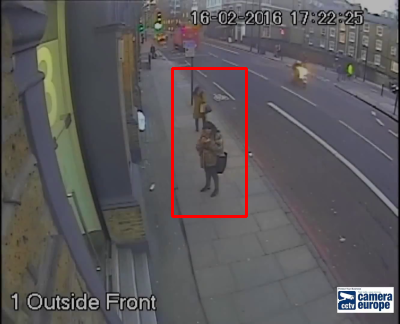

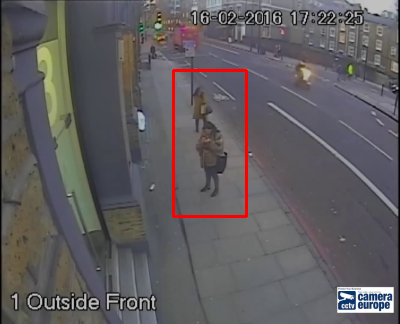

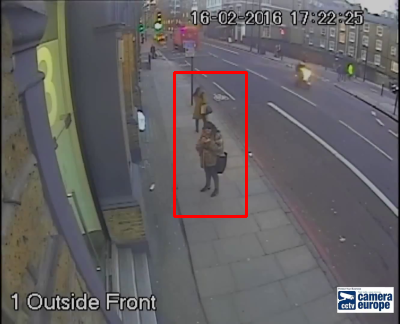

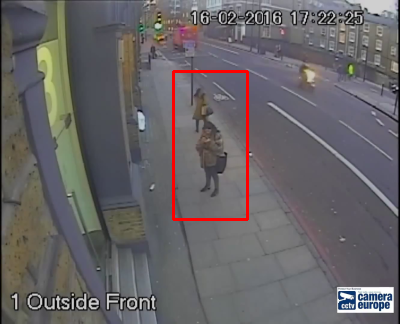

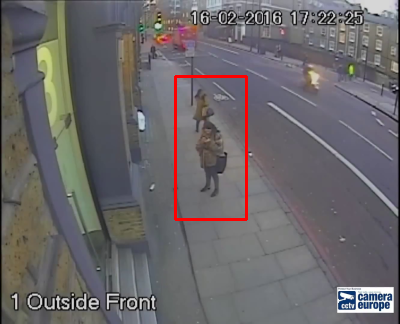

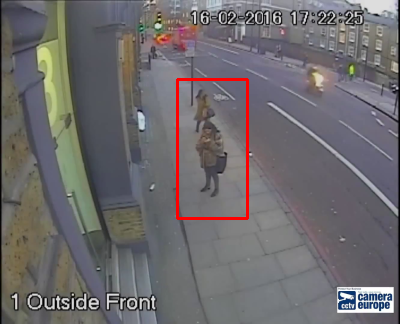

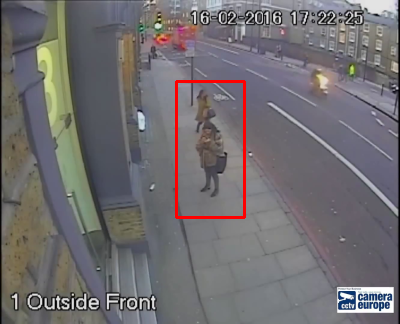

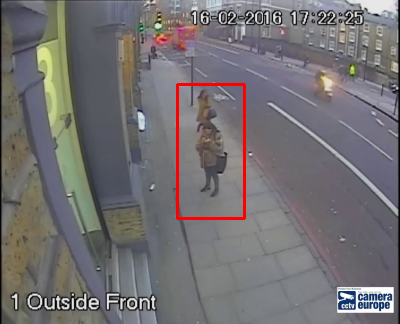

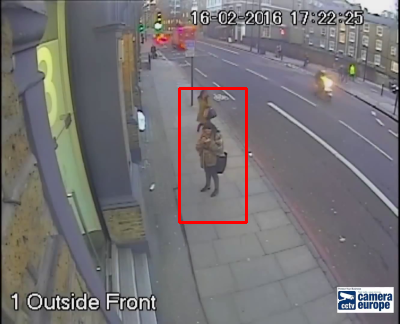

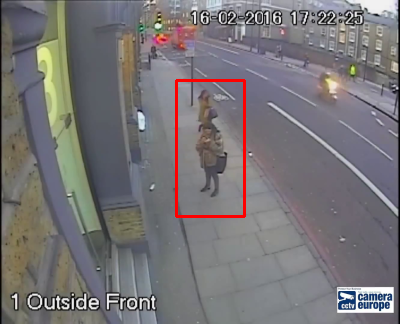

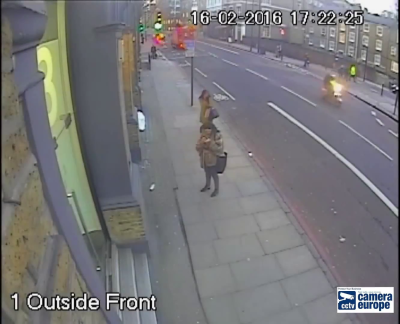

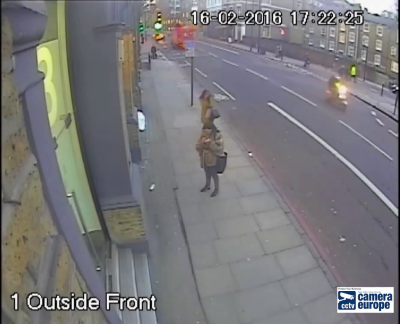

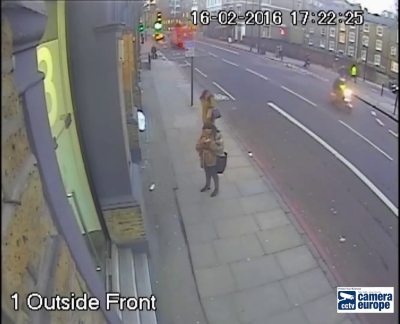

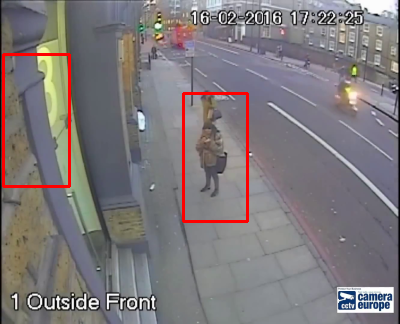

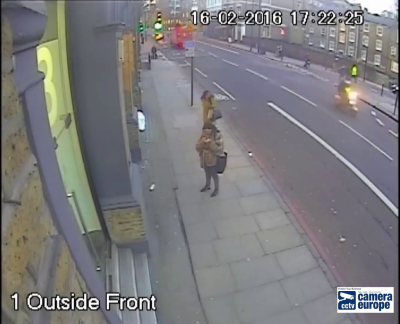

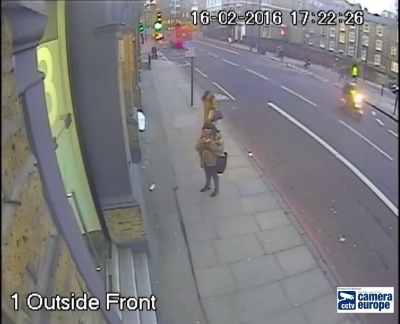

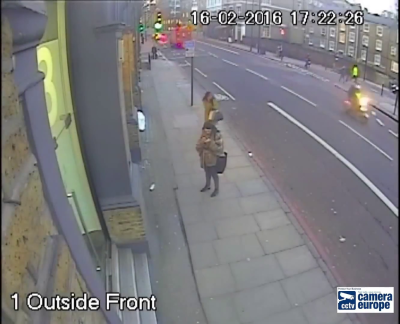

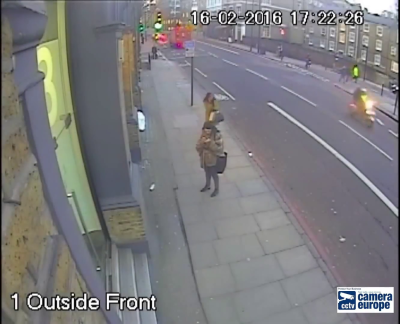

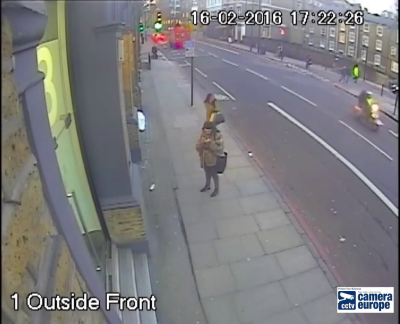

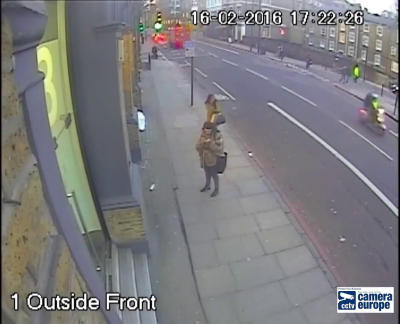

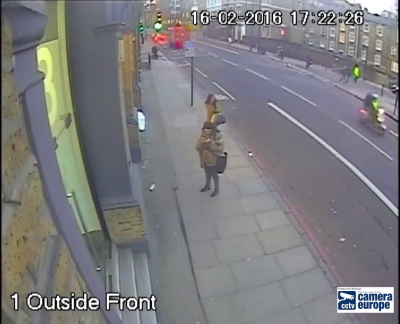

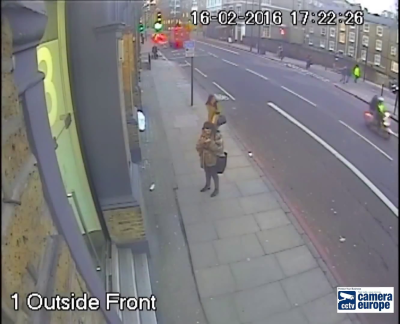

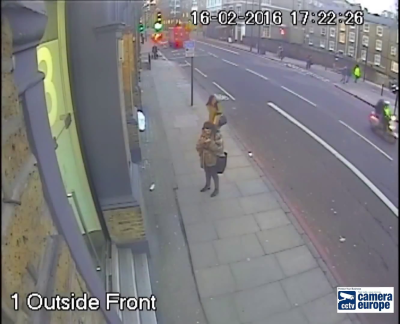

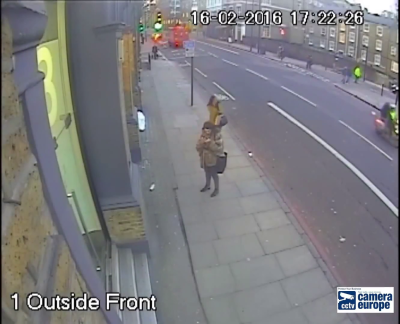

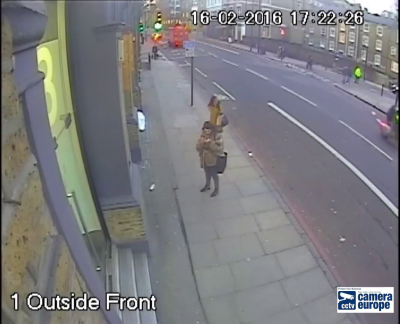

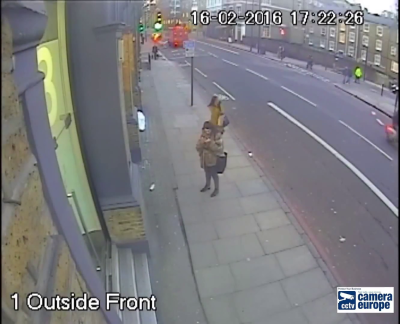

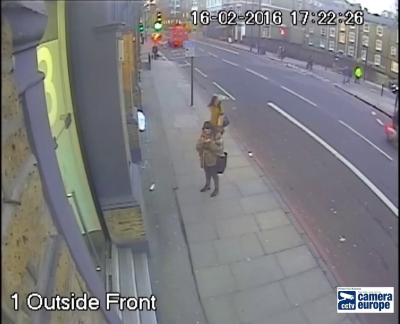

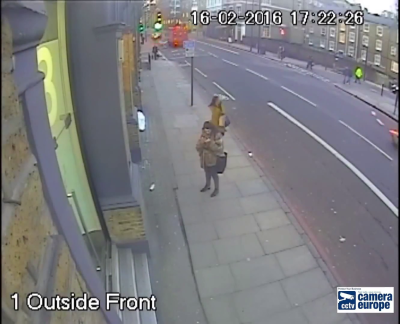

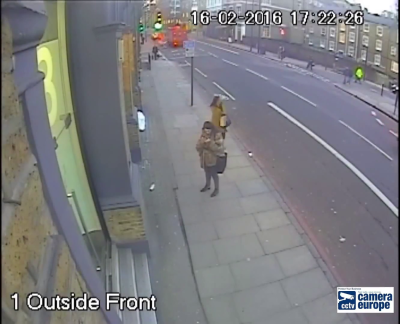

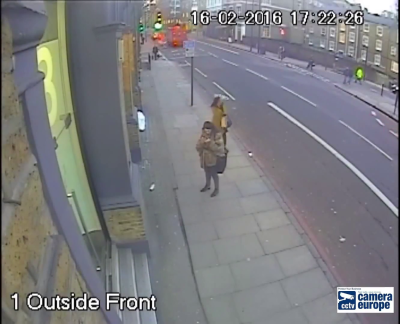

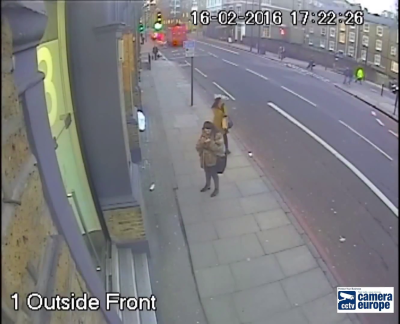

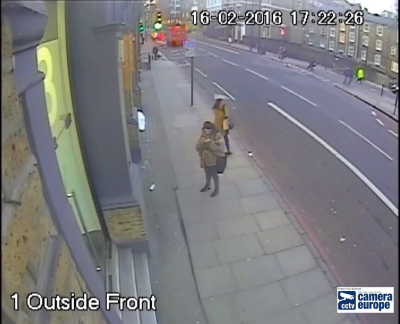

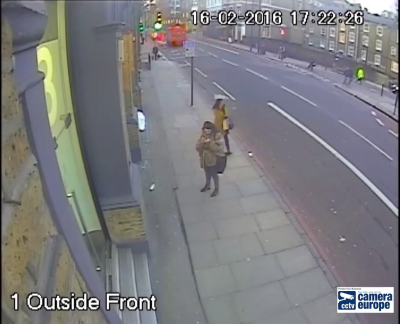

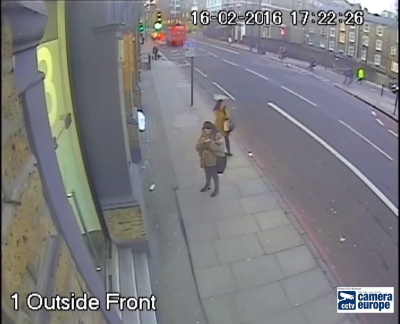

In [ ]:
cap=cv2.VideoCapture('play.mp4')
while cap.isOpened(): 
    # Reading the video stream 
    ret, image = cap.read() 
    if ret: 
        image = imutils.resize(image,  
                               width=min(400, image.shape[1])) 
   
        
        (regions, _) = hog.detectMultiScale(image, 
                                            winStride=(4, 4), 
                                            padding=(4, 4), 
                                            scale=1.05) 
   
        for (x, y, w, h) in regions: 
            cv2.rectangle(image, (x, y), 
                          (x + w, y + h),  
                          (0, 0, 255), 2) 
   
        cv2_imshow(image)  
        if cv2.waitKey(50) & 0xFF == ord('q'): 
            break
    else: 
        break
  